In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
TX = 1
RX = 3
# test folder
#filename = "test/csv" + str(TX) + "x" + str(RX) + ".csv"
# data folder
date = "0708"
action = "sit"
test_id = 2
filename = "data/" + date + "/" + action + "-" + str(test_id) + "/csv" + str(TX) + "x" +str (RX) + ".csv"
test = "data/test/csv1x3.csv"
raw = np.genfromtxt(test, delimiter=',')
raw = raw[:, :-1]
print(raw)
print(raw.shape)

[[ 39.9249  35.1283  45.2769 ...  82.134   65.8635  53.8516]
 [ 42.638   37.5899  56.0803 ...  71.4493  69.1809  52.2015]
 [ 52.2015  47.2652  64.4981 ... 108.      92.8924  71.1196]
 ...
 [ 46.0652  43.0465  56.7979 ...  88.7525  80.0562  65.6049]
 [ 46.6905  34.9285  55.4437 ...  91.5915  76.896   63.8122]
 [ 50.0899  41.3038  50.4777 ...  99.6092  83.678   65.    ]]
(9657, 56)


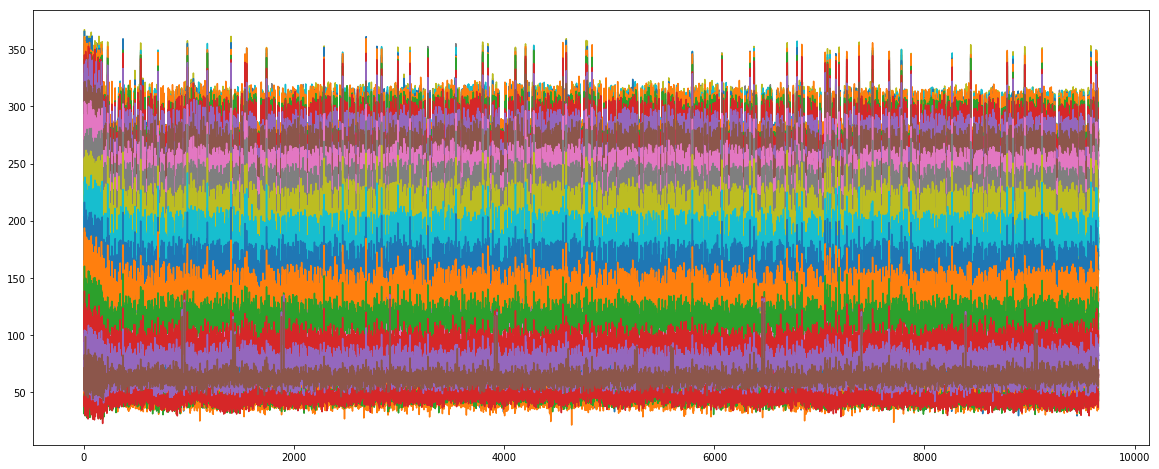

In [3]:
plt.figure(1, figsize=(20,8))
f1 = plt.plot(raw)

In [4]:
ave = np.mean(raw, axis=0)
std = np.std(raw, axis=0)
print("平均值：", ave)
print("標準差：", std)

平均值： [ 48.60429888  43.00581153  52.56949944  67.03292194  85.71459453
 107.26520462 128.17835642 146.33909537 159.61559439 172.36076577
 181.43331034 186.25059739 189.48663943 186.4022536  183.30097784
 169.61341245 155.5556852  138.23983783 118.36993228  97.73915019
  76.8722646   57.5156014   45.23310525  45.58563563  61.71276703
  83.19402531 104.02022944 133.00184803 179.56649967 200.35144178
 216.81774015 229.30959275 245.34142794 251.37089659 260.01685387
 267.32473071 268.87257045 273.8710035  278.09405866 276.83904531
 274.28074112 276.68839917 270.43898505 267.4122305  257.6904304
 247.94805176 231.71955003 217.68768258 201.80947977 181.04910012
 158.47908042 137.57785404 114.20728354  92.43441974  77.22178431
  62.52720896]
標準差： [ 6.00495654  6.22231346  6.69940978  7.40991307  8.81893632  8.98984214
  9.92506719 11.02431435 12.03992319 12.4835474  12.80148468 13.80330451
 14.10686131 13.52473649 12.97863905 12.16379209 11.280315   10.42263753
  8.84400957  8.24022659  6.620

In [35]:
# 濾波-平均與標準差
de = []
for i in range(raw.shape[0]):
    for j in range(raw.shape[1]):
        if (raw[i][j] > (ave[j] + 3 * std[j])) | (raw[i][j] < (ave[j] - 3 * std[j])):
            de.append(i)
            break
preprocess = np.delete(raw, de, 0)
print(preprocess.shape)

(9481, 56)


In [5]:
# 濾波-斜率與標準差
de = []
for i in range(raw.shape[0] - 1):
    for j in range(raw.shape[1]):
        if abs(raw[i + 1][j] - raw[i][j]) > 3.5 * std[j] :
            de.append(i + 1)
            break
preprocess = np.delete(raw, de, 0)
print(preprocess.shape)

(8802, 56)


In [6]:
# 濾波-周圍平均值
de = []
for i in range(raw.shape[0] - 1):
    for j in range(raw.shape[1]):
        if i > 5 and i < raw.shape[0] - 1:
            pavg = np.mean(raw[i-5:i+5],axis=0)
        elif i < 5:
            pavg = np.mean(raw[0:10],axis=0)
        else:
            pavg = np.mean(raw[-1:-11],axis=0)
        if (raw[i][j] > (pavg[j] + 3 * std[j])) | (raw[i][j] < (pavg[j] - 3 * std[j])):
            de.append(i + 1)
            break
p_preprocess = np.delete(raw, de, 0)
print(p_preprocess.shape)

/home/student/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/student/.local/lib/python3.5/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(9440, 56)


(9657, 56) (8802, 56) (9440, 56)


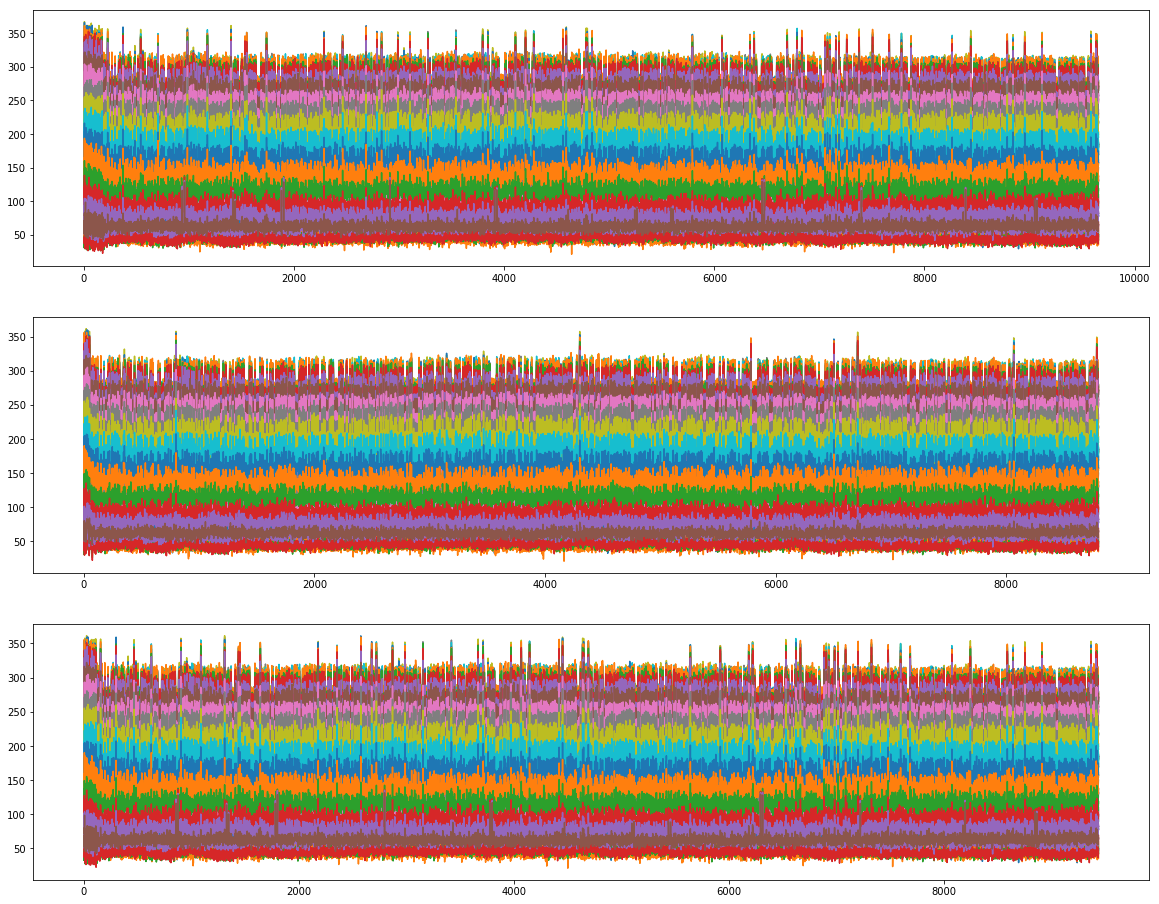

In [9]:
print(raw.shape, preprocess.shape, p_preprocess.shape)
plt.figure(2, figsize=(20,16))
plt.subplot(311)
f1 = plt.plot(raw)
plt.subplot(312)
f2 = plt.plot(preprocess)
plt.subplot(313)
f3 = plt.plot(p_preprocess)


217


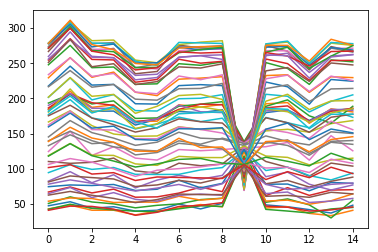

In [13]:
f = plt.plot(raw[9040:9055])
print(len(de))

In [47]:
# save preprocess data
dest = "preprocess/" + date + "/" + action + "-" + str(test_id)
os.mkdir(dest, mode=0o775)

In [52]:
dest = "preprocess/" + date + "/" + action + "-" + str(test_id) + "/csv" + str(TX) + "x" +str (RX) + ".csv"
np.savetxt(dest, preprocess, delimiter=",", fmt='%.4f')